<a href="https://colab.research.google.com/github/utkarshtambe10/LetsGrowMore-Data-Science-Internship-Tasks/blob/main/Exploratory_Data_Analysis_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LetsGrowMore - Intermediate Level Task 1
##Exploratory Data Analysis on Dataset - Terrorism

Performing extensive data analysis of given dataset on Terrorism.

In [ ]:
import warnings
warnings.filterwarnings('ignore')


#Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Importing Dataset

In [ ]:
#downloading/importing dataset from google drive
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
url = "/content/drive/MyDrive/globalterrorismdb_0718dist.csv"
data = pd.read_csv(url, encoding="latin1")


In [ ]:
data.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
data.tail()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
data.columns.values


array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

#Renaming of Attributes

In [ ]:
data.rename(columns = {'iyear': 'year', 'imonth': 'month', 'iday': 'day', 'gname': 'group', 'country_txt': 'Country', 
                       'region_txt': 'Region', 'provstate': 'state', 'longitude': 'longitude', 'summary': 'summary', 
                       'attacktype1_txt': 'attackType', 'targtype1_txt': 'targetType', 'weaptype1_txt': 'weapon', 'nkill': 'kill', 'nwound': 'wound'}, inplace = True)


In [ ]:
data = data[['year', 'month', 'day', 'Country', 'state', 
             'Region', 'city', 'latitude', 'longitude', 'attackType', 
             'kill', 'wound', 'target1', 'summary', 'group', 
             'targetType', 'weapon', 'motive']]


In [ ]:
data.head()


,year,month,day,Country,state,Region,city,latitude,longitude,attackType,kill,wound,target1,summary,group,targetType,weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:
data.shape


(181691, 18)

Checking for any NULL values if present

In [ ]:
data.isnull().sum()


year               0
month              0
day                0
Country            0
state            421
Region             0
city             434
latitude        4556
longitude       4557
attackType         0
kill           10313
wound          16311
target1          636
summary        66129
group              0
targetType         0
weapon             0
motive        131130
dtype: int64

In [ ]:
data['wound'] = data['wound'].fillna(0)
data['kill'] = data['kill'].fillna(0)

data['casualities'] = data['kill'] + data['wound']


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   attackType   181691 non-null  object 
 10  kill         181691 non-null  float64
 11  wound        181691 non-null  float64
 12  target1      181055 non-null  object 
 13  summary      115562 non-null  object 
 14  group        181691 non-null  object 
 15  targetType   181691 non-null  object 
 16  weapon       181691 non-null  object 
 17  motive       50561 non-null   object 
 18  casualities  181691 non-

In [ ]:
data.describe()


,year,month,day,latitude,longitude,kill,wound,casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


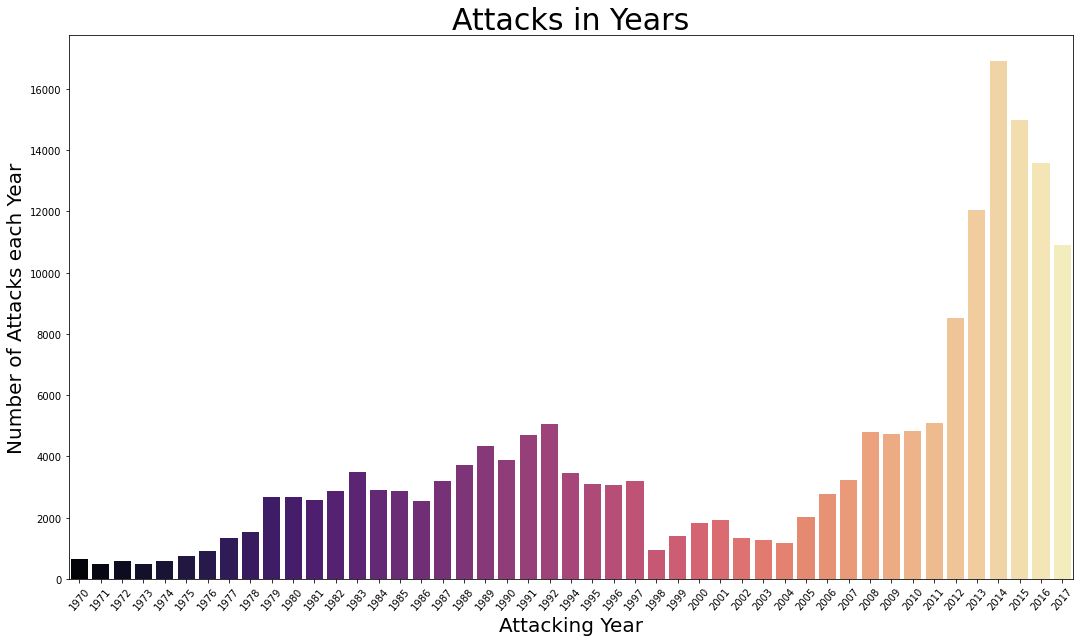

In [ ]:
yr = data['year'].unique()
yr_count = data['year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18, 10))
sns.barplot(x = yr, y = yr_count, palette = "magma")
plt.xticks(rotation = 50)
plt.xlabel("Attacking Year", fontsize = 20)
plt.ylabel("Number of Attacks each Year", fontsize = 20)
plt.title("Attacks in Years", fontsize = 30)

plt.show()


In [ ]:
attack = data['year'].value_counts(dropna = False).sort_index()
attack = pd.DataFrame(attack).reset_index().rename(columns = {'index': 'year', 'year': 'attacks'}).set_index('year')
attack.tail(9)


,attacks
year,
2009,4721
2010,4826
2011,5076
2012,8522
2013,12036
2014,16903
2015,14965
2016,13587
2017,10900


* The graph shows that from year **2009 - 2014** the terrorism is increasing 
every year and, after that there is gradual fall in it.
* The most attacks are seen in the year **2014**.

Terrorist Activities by Region every Year

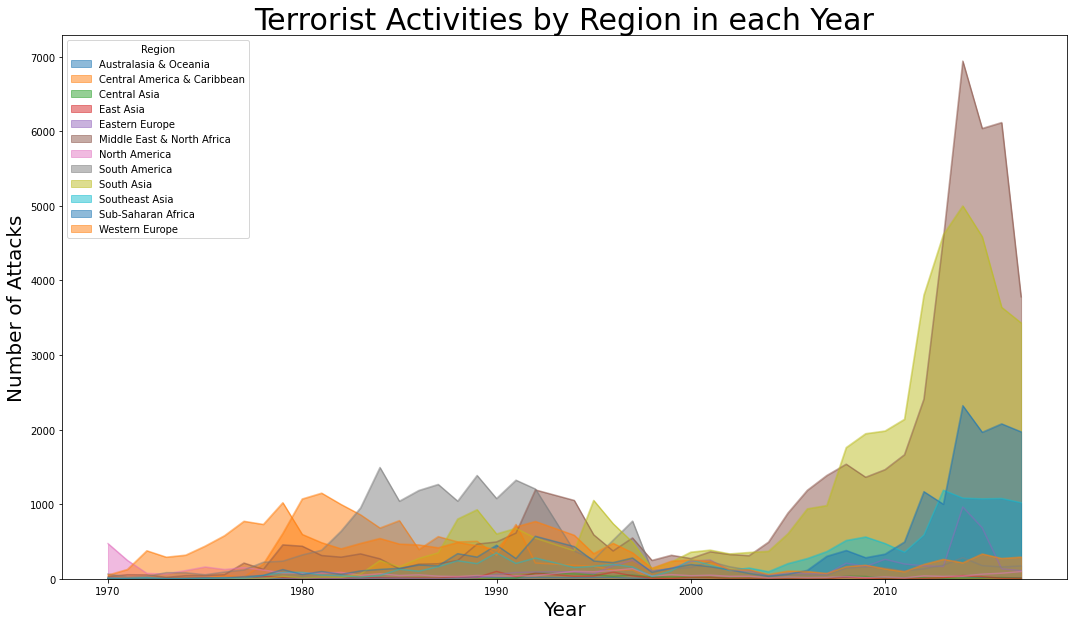

In [ ]:
pd.crosstab(data.year, data.Region).plot(kind = 'area', stacked = False, figsize = (18, 10))
plt.title("Terrorist Activities by Region in each Year", fontsize = 30)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Number of Attacks", fontsize = 20)

plt.show()


Number of attacks in months by considering all the years

In [ ]:
# checking all the months
data["month"].unique()


array([ 7,  0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12])

In [ ]:
#value counts of all the months
data["month"].value_counts()


5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: month, dtype: int64

In [ ]:
data[data["month"] == 0].index


Int64Index([    1,  1123,  1690,  2164,  2165,  2744,  3484,  3485,  4407,
             4408,  4409,  4410,  4411,  5726,  5727,  7252,  7253,  7254,
            15163, 26987],
           dtype='int64')

In [ ]:
#dropping '0' as very less data is present as compared to others
data.drop(index = data[data["month"] == 0].index, inplace = True)


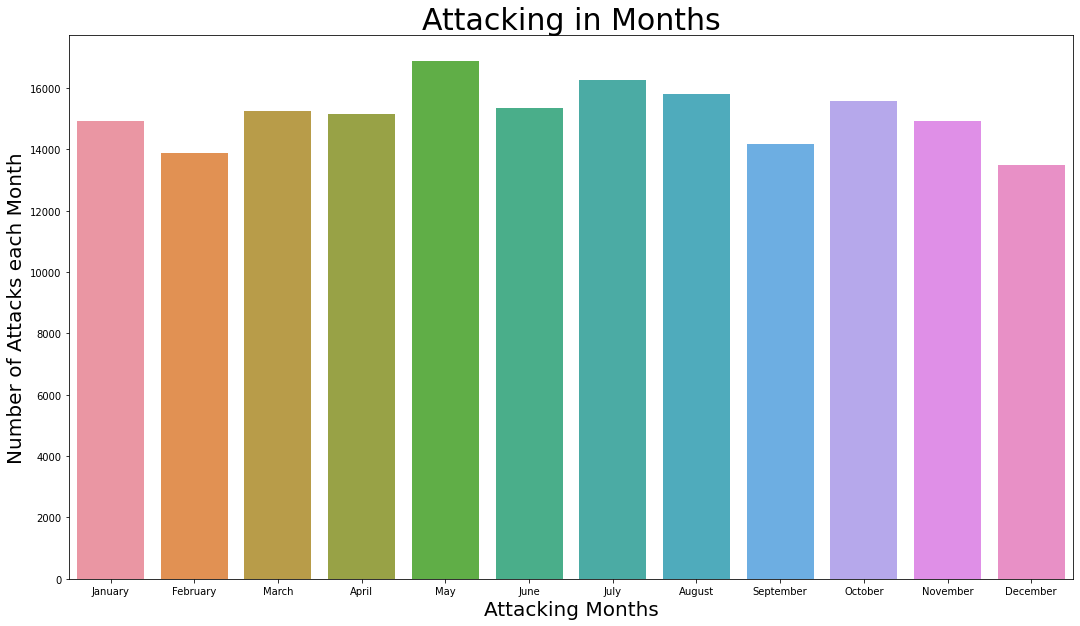

In [ ]:
plt.figure(figsize = (18, 10))
sns.countplot(x = "month", data = data)

positions = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
labels = ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December')

plt.xticks(positions, labels, fontsize = 10, rotation = 0)
plt.xlabel("Attacking Months", fontsize = 20)
plt.ylabel("Number of Attacks each Month", fontsize = 20)
plt.title("Attacking in Months", fontsize = 30)

plt.show()


* Most attacks are recorded in the month of **May**

Top Countries affected by Terrorism

In [ ]:
attacks = data.Country.value_counts()[: 10]
attacks


Iraq              24636
Pakistan          14367
Afghanistan       12731
India             11960
Colombia           8304
Philippines        6906
Peru               6096
El Salvador        5319
United Kingdom     5235
Turkey             4290
Name: Country, dtype: int64

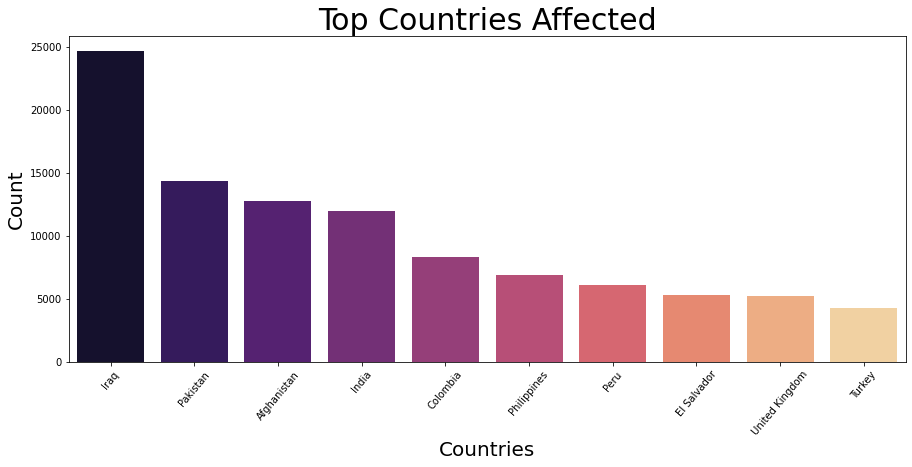

In [ ]:
plt.subplots(figsize = (15, 6))
sns.barplot(data['Country'].value_counts()[: 10].index, data['Country'].value_counts()[: 10].values, palette = "magma")
plt.title("Top Countries Affected", fontsize = 30)
plt.xlabel("Countries", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.xticks(rotation = 50)

plt.show()


Terrorism Visualization for Kills by Region

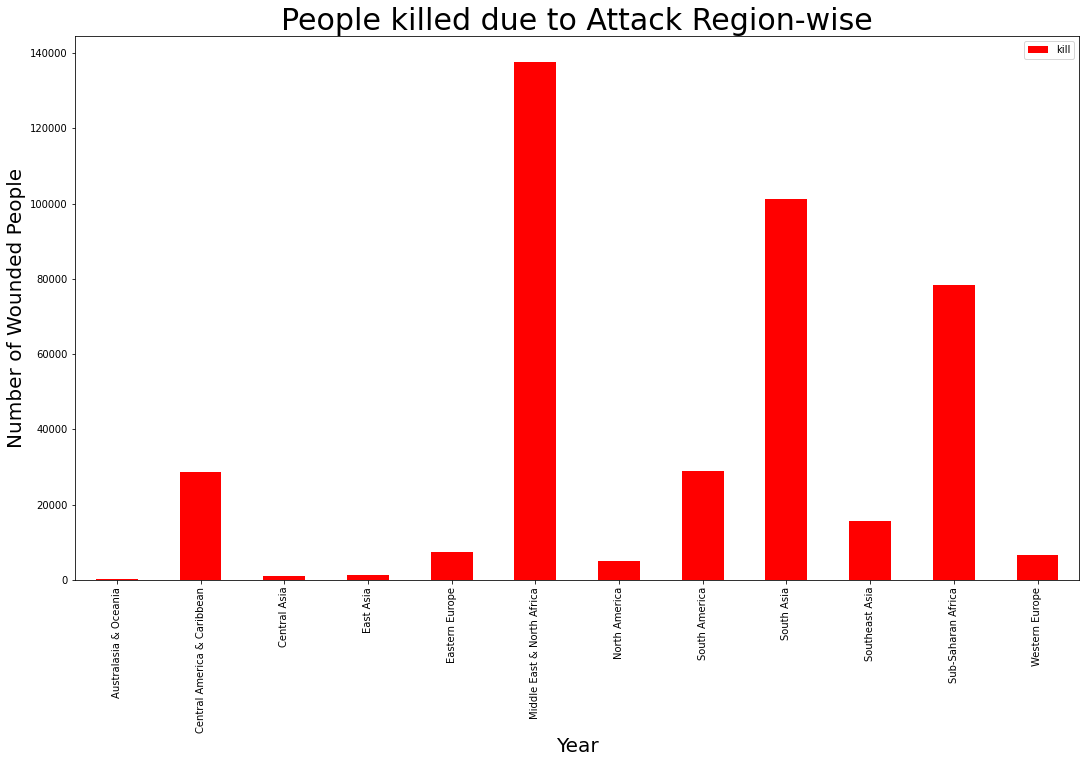

Region
Australasia & Oceania             150.0
Central America & Caribbean     28708.0
Central Asia                     1000.0
East Asia                        1149.0
Eastern Europe                   7415.0
Middle East & North Africa     137642.0
North America                    4916.0
South America                   28849.0
South Asia                     101319.0
Southeast Asia                  15637.0
Sub-Saharan Africa              78386.0
Western Europe                   6694.0
Name: kill, dtype: float64

In [ ]:
kill_region = (data.groupby("Region").sum()["kill"])

plt.figure(figsize = (18, 10))
kill_region.plot(kind = "bar", color = "red")

plt.title("People killed due to Attack Region-wise", fontsize = 30)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Number of Wounded People", fontsize = 20)
plt.legend(loc = 0, fontsize = 10)

plt.show()

kill_region

* From above analysis, **Middle East and North Africa** region has more number of attacks

Finding number of deaths due to attack every Year

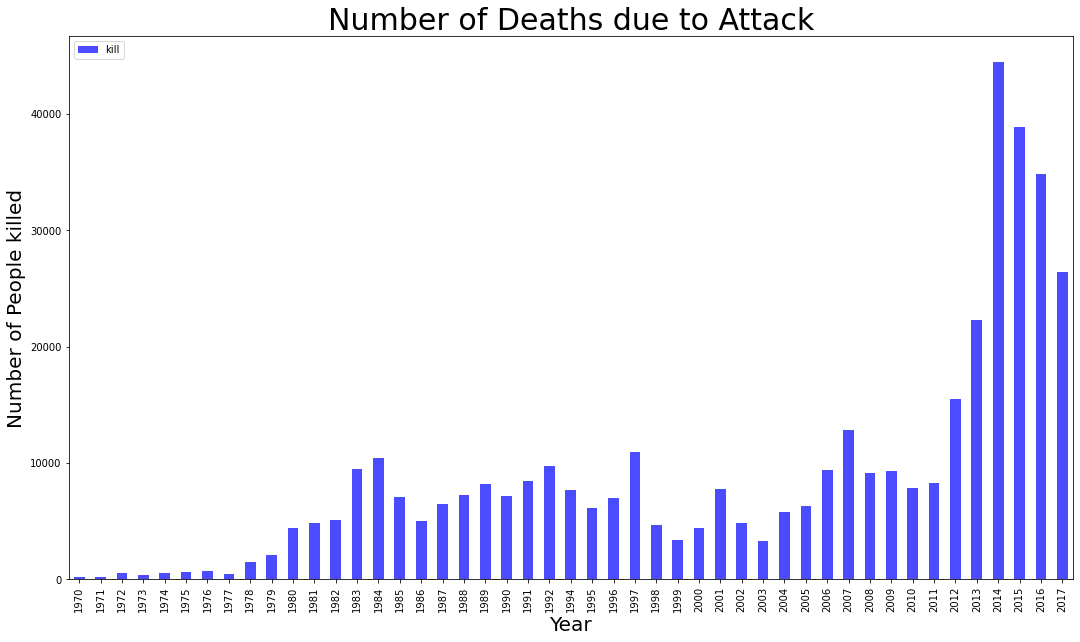

In [ ]:
dt = data[['year', 'kill']].groupby(['year']).sum()

dt.plot(kind = 'bar', alpha = 0.7, color = 'blue', figsize = (18, 10))
plt.title("Number of Deaths due to Attack", fontsize = 30)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Number of People killed", fontsize = 20)
plt.legend(loc = "upper left", fontsize = 10)

plt.show()


* Year **2014** recorded the highest number of deaths due to terrorism.

Visualizing Attacks according to different Locations

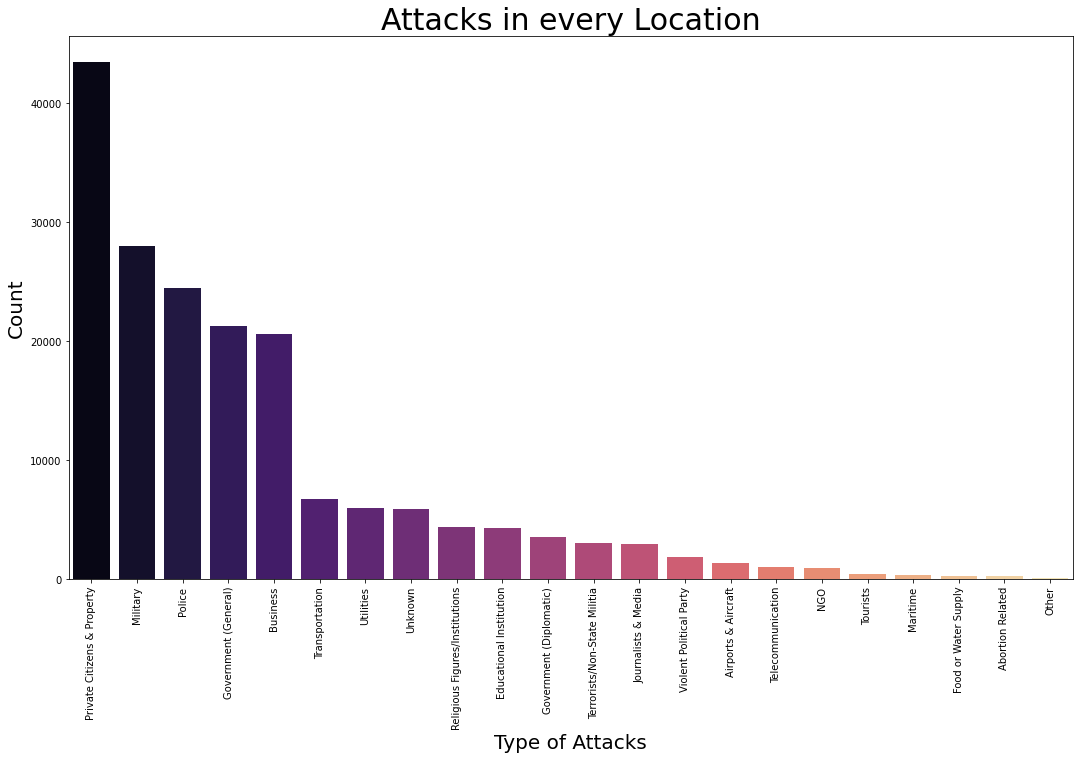

In [ ]:
plt.figure(figsize = (18, 10))
sns.countplot(data.targetType, order = data.targetType.value_counts().index, palette = "magma")

plt.xticks(rotation = 90)
plt.xlabel("Type of Attacks", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Attacks in every Location", fontsize = 30)

plt.show()


* Most prone locations of the terrorist attacks is **Private Citizens & Property**.

Number of people wounded in Terrorist attacks

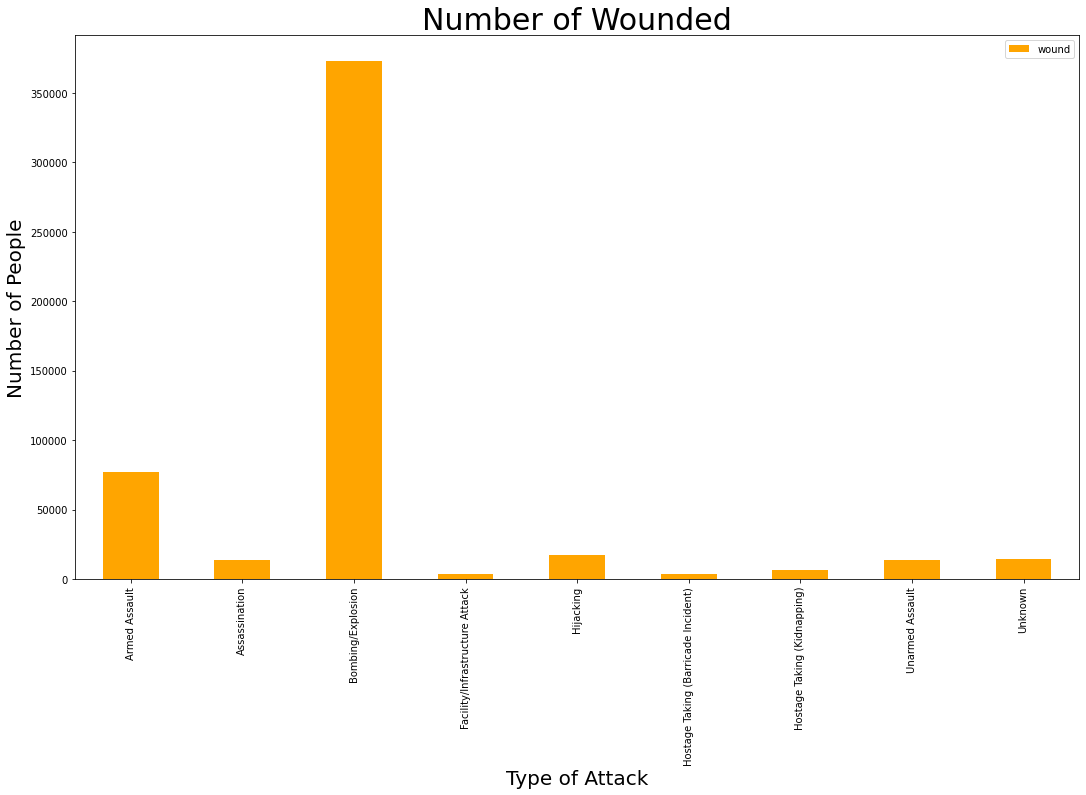

In [ ]:
data[["attackType", "wound"]].groupby(["attackType"], axis = 0).sum().plot(kind = "bar", figsize = (18, 10), color = ["orange"])

plt.xlabel('Type of Attack', fontsize = 20)
plt.ylabel('Number of People', fontsize = 20)
plt.title('Number of Wounded', fontsize= 30)
plt.legend( fontsize = 10)

plt.show()


* The most wounded people are due to **Bombing/Explosion**.

Top Cities affected by Terrorism in the World

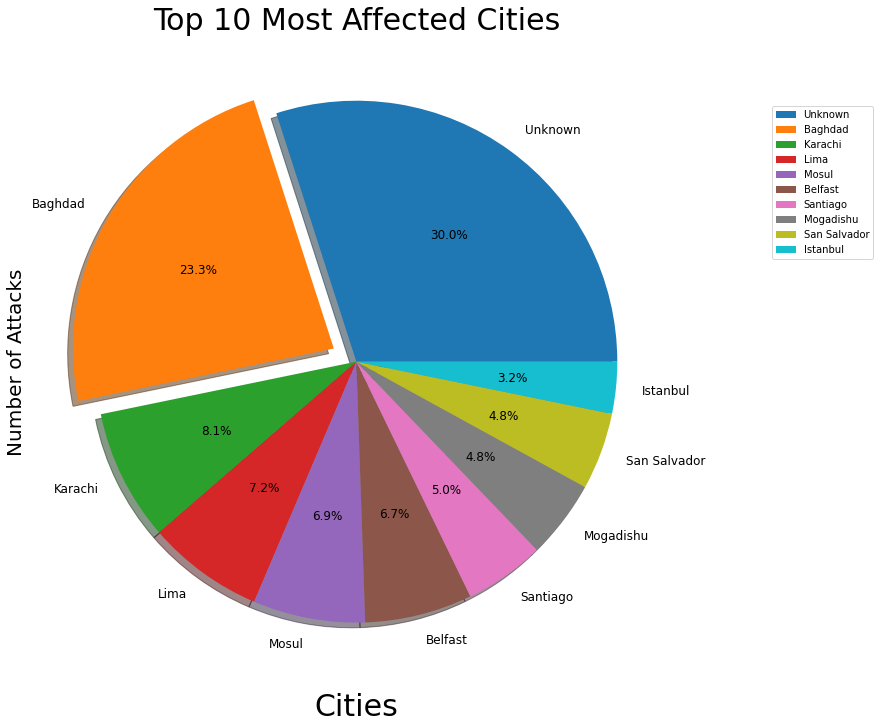

In [ ]:
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
data['city'].value_counts().to_frame().sort_values('city', axis = 0, ascending = False).head(10).plot(kind= 'pie',
                                                subplots = True, explode = explode, figsize=(12, 12), shadow = True, 
                                                textprops = {'fontsize' : 12, 'weight' : 'light', 'color' : 'k'},
                                                autopct = '%1.1f%%')

plt.xticks(rotation = 50)
plt.xlabel('Cities', fontsize = 30, c = 'black')
plt.ylabel('Number of Attacks', fontsize = 20, c = 'black')
plt.title('Top 10 Most Affected Cities', fontsize = 30, color= 'black')
plt.legend(loc = 'upper right', bbox_to_anchor =(1.3, 0.9), fontsize = 10)  #location of legend

plt.show()


* From above pie-chart, **Baghdad** is the most affected due to terror attacks.

In [ ]:
data.group.value_counts()[1: 10]


Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2771
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: group, dtype: int64

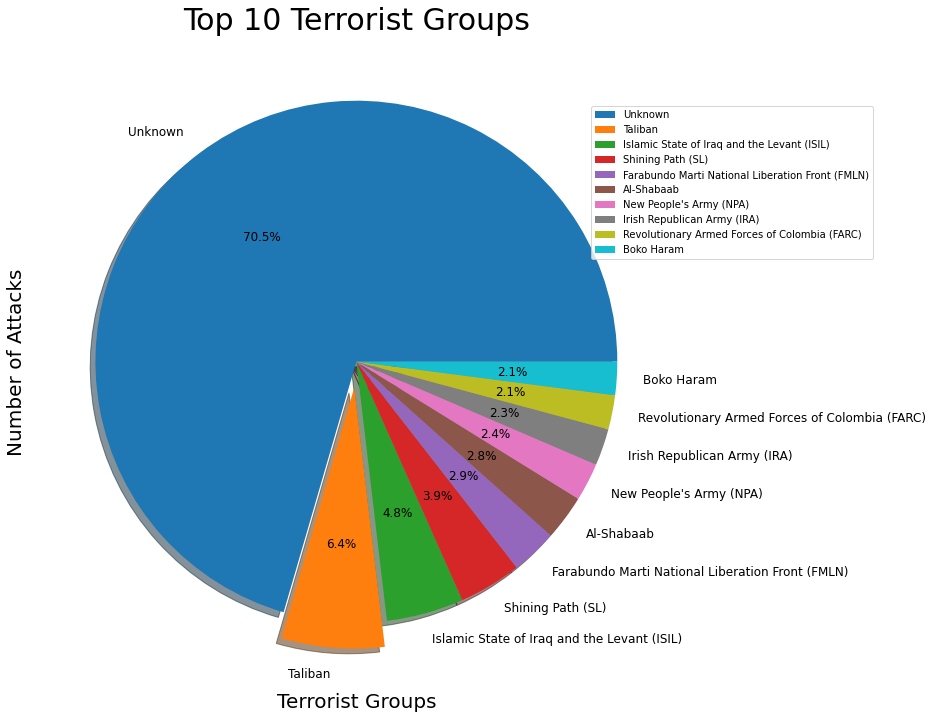

In [ ]:
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
data['group'].value_counts().to_frame().sort_values('group', axis = 0, ascending = False).head(10).plot(kind = 'pie',
                                                subplots = True, explode = explode,figsize=(12, 12), shadow = True, 
                                                textprops = {'fontsize' : 12, 'weight' : 'light', 'color' : 'k'},
                                                autopct = '%1.1f%%')

plt.title("Top 10 Terrorist Groups",fontsize = 30, color = "black")
plt.xlabel("Terrorist Groups", fontsize = 20, color = "black")
plt.ylabel("Number of Attacks",fontsize = 20, color = "black")
plt.xticks(rotation = 50)
plt.legend(loc = 'upper right', bbox_to_anchor = (1.3, 0.9), fontsize = 10)

plt.show()


* The most effective terrorist group after **Unknowns** is **Taliban**.

Top 10 Terrorist groups as per Kills

In [ ]:
dt = data[['group', 'Country', 'kill']]
dt = dt.groupby(["group", "Country"], axis = 0).sum().sort_values('kill', ascending = False).drop('Unknown').reset_index().head(10)
data['group'].value_counts().to_frame().drop('Unknown').head(10)
dt


,group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


Number of people lost there Lives

In [ ]:
kill = data.loc[:, 'kill']
print('Number of People Killed by terror attack: ', int(sum(kill.dropna())))


Number of People Killed by terror attack:  411865


Number of Kills as per Attack type


In [ ]:
typekill = data.pivot_table(columns = "attackType", values = 'kill', aggfunc = 'sum')
typekill


attackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32378.0


##Observation and Conclusion

* Country with the most attacks: **Iraq**
* City with the most attacks: **Baghdad**
* Location with the most attacks: **Private Citizens & Property**
* Year with the most attacks: **2014**
* Month with the most attacks: **May**
* Terrorist Group with the most attacks: **Taliban**
* Most attack type: **Bombing/Explosion**